In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
companies = pd.read_csv("Unicorn_Companies.csv")

In [3]:
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [7]:
# How large the dataset is
print(companies.size)
companies.shape

10740


(1074, 10)

In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [11]:
#Use pd.to_datetime() to convert Date Joined column to datetime 
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [12]:
# Use .dt.year to extract year component from Date Joined column
companies["Year Joined"] = companies["Date Joined"].dt.year
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [13]:
# Sample the data
companies_sample = companies.sample(n = 50, random_state = 42)

In [22]:
# Prepare data for plotting
# Create new `years_till_unicorn` column 
companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


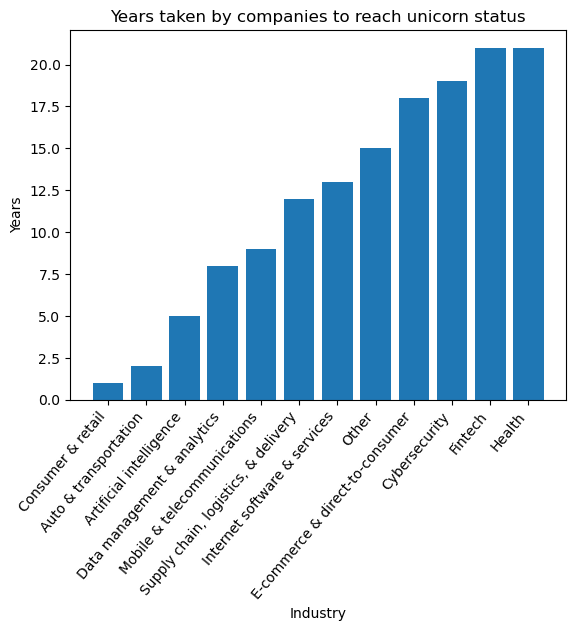

In [26]:
# Create bar plot
# with Industry column as the categories of the bars
# and the difference in years between Year Joined column and Year Founded column as the heights of the bars
plt.bar(grouped.index,grouped.years_till_unicorn)
plt.title("Years taken by companies to reach unicorn status")
plt.xlabel("Industry")
plt.ylabel("Years")
# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  
plt.xticks(rotation=50, horizontalalignment="right")
plt.show()

This bar plot shows that for this sample of unicorn companies, the largest value for maximum time taken to become a unicorn occurred in the Heath and Fintech industries, while the smallest value occurred in the Consumer & Retail industry.

In [27]:
# Create a column representing company valuation as numeric data

# Create new column
companies_sample['valuation_billions'] = companies_sample['Valuation']
# Remove the '$' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '')
# Remove the 'B' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '')
# Convert column to type int
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3
